In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importando o Banco de Dados

In [77]:
dados = pd.read_excel('Dados\default of credit card clients.xls', header =1)

# Dados pessoais

O banco de dados consiste em 24 variaveis no total, as primeiras 6 variaveis aopresentam informações sobre as informações pessoais dos clientes.

Estão codificadas da seguinte maneira:

1. ID: Código de cada cliente, variavel catégorica nominal;
2. LIMIT_BAL: Quantidade de crédito disponivel em novos dolarés Taiwaneses, variavel numerica;
3. SEX: Indicando o gênero em 1 para homem e 2 para mulheres, variavel catégorica nominal;
4. EDUCATION: Representando o nivel educacional em numeros de 1 a 6 começando com pós-graduação, nivel superior, nivel médio e outros, respectivamente, variavel categórica ordinal;
5. MARRIAGE: Apresentando estado civil com 1 para casado, 2 para solteiro e 3 para outros, variavel categórica nominal;
6. AGE: Idade em anos e numeros inteiros, variavel numerica.

In [78]:
dados.loc[0:6,"ID":"AGE"]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,1,20000,2,2,1,24
1,2,120000,2,2,2,26
2,3,90000,2,2,2,34
3,4,50000,2,2,1,37
4,5,50000,1,2,1,57
5,6,50000,1,1,2,37
6,7,500000,1,1,2,29


In [79]:

print("Distibuição de gênero\n",dados["SEX"].value_counts(normalize = True))

print("Distibuição de Educação\n",dados["EDUCATION"].value_counts(normalize = True))

print("Distibuição de Casamento\n",dados["MARRIAGE"].value_counts(normalize = True))



Distibuição de gênero
 2    0.603733
1    0.396267
Name: SEX, dtype: float64
Distibuição de Educação
 2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64
Distibuição de Casamento
 2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64


Aterando linhas onde a variavel de casamento está com valor 0 e incluir no grupo outros com valor 3, juntamente com nivel educaional com valores 0, 5, 6 no grupo outros com valor 4

In [89]:
dados.loc[dados['MARRIAGE'] == 0, 'MARRIAGE'] = 3

dados.loc[dados['EDUCATION'] == 0, 'EDUCATION'] = 4
dados.loc[dados['EDUCATION'] == 5, 'EDUCATION'] = 4
dados.loc[dados['EDUCATION'] == 6, 'EDUCATION'] = 4

print("Distibuição de Educação\n",dados["EDUCATION"].value_counts(normalize = True))

print("Distibuição de Casamento\n",dados["MARRIAGE"].value_counts(normalize = True))


Distibuição de Educação
 2    0.467667
1    0.352833
3    0.163900
4    0.015600
Name: EDUCATION, dtype: float64
Distibuição de Casamento
 2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64


In [90]:

pd.crosstab(columns = dados['default payment next month'],index= dados['MARRIAGE'], margins = 1)

default payment next month,0,1,All
MARRIAGE,,,
1,10453,3206,13659
2,12623,3341,15964
3,288,89,377
All,23364,6636,30000


In [91]:
pd.crosstab(columns = dados['default payment next month'],index= dados['EDUCATION'], margins = 1)

default payment next month,0,1,All
EDUCATION,,,
1,8549,2036,10585
2,10700,3330,14030
3,3680,1237,4917
4,435,33,468
All,23364,6636,30000


In [71]:
print("Média de pagamentos: ",dados["default payment next month"].mean()*100,"% \n")


Média de pagamentos:  22.12 % 

Pessoas que pagaram vs. pessoas inadimplentes:
 0    0.7788
1    0.2212
Name: default payment next month, dtype: float64


Text(0, 0.5, 'Frequência')

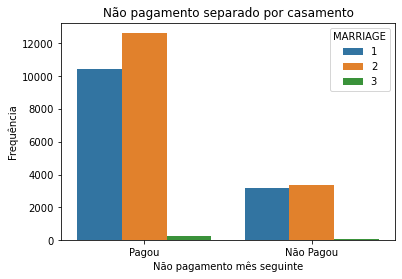

In [74]:
casamento_pagamento = sns.countplot(x = "default payment next month",  
              hue = "MARRIAGE",
              dodge = 1,
              data = dados)
casamento_pagamento.set_title('Não pagamento separado por casamento')
casamento_pagamento.set_xticklabels(["Pagou","Não Pagou"])
casamento_pagamento.set_xlabel('Não pagamento mês seguinte')
casamento_pagamento.set_ylabel('Frequência')